In [77]:
#Nick Gamez jyi358
# Packages Required

from __future__ import division
import tensorflow as tf
import numpy as np
import tarfile
import os
import matplotlib
import matplotlib.pyplot as plt
import time
%matplotlib inline 

In [78]:
# Load Data

def import_data():
    if "data" not in os.listdir(os.getcwd()):
        print("Extracting Data")
        tarData = tarfile.open("data.tar.gz")
        tarData.extractall()
        tarData.close()
    else:
        pass
    
    print("Loading Training Data")
    trainX = np.genfromtxt("data/trainX.csv", delimiter="\t")
    trainY = np.genfromtxt("data/trainY.csv", delimiter="\t")
    print("Loading Test Data")
    testX = np.genfromtxt("data/testX.csv", delimiter="\t")
    testY = np.genfromtxt("data/testY.csv", delimiter="\t")
    return trainX, trainY, testX, testY

trainX, trainY, testX, testY = import_data()

Loading Training Data
Loading Test Data


In [102]:
## Parameters
# Number of words
numFeatures = trainX.shape[1]
# Number of classes to predict
numLabels = trainY.shape[1]

epochs = 27000
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step=1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate=0.95,
                                          staircase=True)

In [103]:
# PlaceHolders
X = tf.placeholder(tf.float32, [None, numFeatures])
yGold = tf.placeholder(tf.float32, [None, numLabels])


## Part B Variables
nodesHidden = 4

weights1 = tf.Variable(tf.random_normal([numFeatures, nodesHidden],
                                        mean=0,
                                        stddev=np.sqrt(6/(numFeatures
                                                          +numLabels+1)),
                                        name="weights1"))
bias1 = tf.Variable(tf.random_normal([nodesHidden],
                                    mean=0,
                                    stddev=np.sqrt(6/(numFeatures
                                                      +numLabels+1)),
                                    name="bias1"))

weightHidden = tf.Variable(tf.random_normal([nodesHidden, numLabels]))
biasHidden = tf.Variable(tf.random_normal([numLabels]))

In [104]:
## Prediction

initialize = tf.initialize_all_variables()

## Part B
firstLayer = tf.nn.sigmoid(tf.add(tf.matmul(X, weights1),bias1))
activation = tf.nn.sigmoid(tf.add(tf.matmul(firstLayer,weightHidden),
                                  biasHidden))

cost = tf.nn.l2_loss(activation-yGold, name="squaredErrorCostA")

training = tf.train.GradientDescentOptimizer(learningRate).minimize(
        cost)

In [105]:
errors =[]
with tf.Session() as sess:
    sess.run(initialize)
    
    correctPrediction = tf.equal(tf.argmax(activation,1), 
                                 tf.argmax(yGold,1))
    accuracy = tf.reduce_mean(tf.cast(correctPrediction,"float"))
    
    activationSummary = tf.histogram_summary("outputA", activation)
    accuracySummary = tf.scalar_summary("accuracyA", accuracy)
    costSummary = tf.scalar_summary("costA", cost)
    
    weightSummary = tf.histogram_summary("weightsA", 
                                         weights.eval(session=sess))
    biasSummary = tf.histogram_summary("biasesA", bias.eval(session=sess))
    
    allSummary = tf.merge_all_summaries()
    
    writer = tf.train.SummaryWriter("summary_logs", sess.graph_def)
    
    cost = 0
    diff = 1
    
    for i in range(epochs):
        if i > 1 and diff < 0.0001:
            print("change in cost %g; convergence."%diff)
            break
        else:
            step = sess.run(training, feed_dict={X: trainX, yGold: trainY})
            Caccuracy = accuracy.eval(feed_dict={X: trainX, yGold: trainY})
            errors.append(1-Caccuracy)
            if i % 1000 == 0:
           #     epochValues.append(i)
                print("Epoch: %i error: %f"%(i,errors[-1]))
           #     summaryResults, trainAccuracy, newCost = sess.run(
           #         [allSummary, accuracy, cost],
           #         feed_dict={X: trainX, yGold: trainY}
           #     )
                
           #     accuracyValues.append(trainAccuracy)
           #     costValues.append(newCost)
           #     writer.add_summary(summaryResults, i)
                
           #     diff = abs(newCost - cost)
           #     cost = newCost
                
           #     print("step %d:\n\t training accuracy\n\t cost %g\n\t change in cost %g %g"%(i,trainAccuracy, newCost, diff))

           #     accuracyLine = ax1.plot(epochValues, accuracyValues)
           #     costLine = ax2.plot(epochValues, costValues)
           #     fig.canvas.draw()
           #     time.sleep(1)
                
    print("Final Accuracy on Test Set: %s"%str(sess.run(accuracy,
                                                        feed_dict={X: testX,
                                                                   yGold: testY})))
    saver = tf.train.Saver()

Epoch: 0 error: 0.466946
Epoch: 1000 error: 0.466946
Epoch: 2000 error: 0.466946
Epoch: 3000 error: 0.335782
Epoch: 4000 error: 0.066107
Epoch: 5000 error: 0.049318
Epoch: 6000 error: 0.039874
Epoch: 7000 error: 0.034627
Epoch: 8000 error: 0.030430
Epoch: 9000 error: 0.023085
Epoch: 10000 error: 0.017838
Epoch: 11000 error: 0.016789
Epoch: 12000 error: 0.014690
Epoch: 13000 error: 0.014690
Epoch: 14000 error: 0.014690
Epoch: 15000 error: 0.014690
Epoch: 16000 error: 0.013641
Epoch: 17000 error: 0.013641
Epoch: 18000 error: 0.013641
Epoch: 19000 error: 0.013641
Epoch: 20000 error: 0.009444
Epoch: 21000 error: 0.008395
Epoch: 22000 error: 0.007345
Epoch: 23000 error: 0.005247
Epoch: 24000 error: 0.005247
Epoch: 25000 error: 0.005247
Epoch: 26000 error: 0.005247
Final Accuracy on Test Set: 0.990476


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


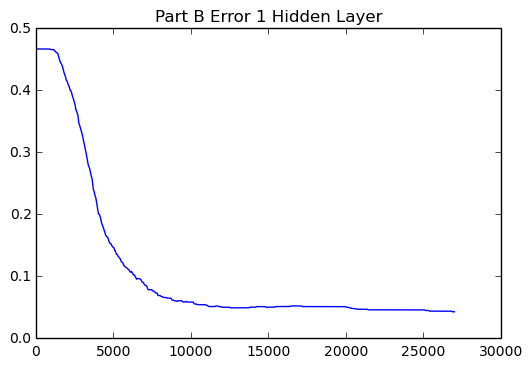

Error settles around 23k-th Epoch using 0.0008 Learning Rate


In [110]:
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.title("Part B Error 1 Hidden Layer")
plt.show()

print("Error settles around 23k-th Epoch using 0.0008 Learning Rate")

In [123]:
## Part A 

## Parameters
# Number of words
numFeatures = trainX.shape[1]
# Number of classes to predict
numLabels = trainY.shape[1]

epochs = 27000
learningRate = tf.train.exponential_decay(learning_rate=0.0010,
                                          global_step=1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate=0.95,
                                          staircase=True)

# Variables
weights = tf.Variable(tf.random_normal([numFeatures, numLabels],
                                        mean=0,
                                        stddev=np.sqrt(6/(numFeatures
                                                          +numLabels+1)),
                                        name="weightsA"))
bias = tf.Variable(tf.random_normal([numLabels],
                                    mean=0,
                                    stddev=np.sqrt(6/(numFeatures
                                                      +numLabels+1)),
                                    name="biasA"))

initialize = tf.initialize_all_variables()

activation = tf.nn.sigmoid(tf.add(tf.matmul(X,weights),bias))

cost = tf.nn.l2_loss(activation-yGold, name="squaredErrorCostA")

training = tf.train.GradientDescentOptimizer(learningRate).minimize(
        cost)

In [109]:
errors =[]
with tf.Session() as sess:
    sess.run(initialize)
    
    correctPrediction = tf.equal(tf.argmax(activation,1), 
                                 tf.argmax(yGold,1))
    accuracy = tf.reduce_mean(tf.cast(correctPrediction,"float"))
       
    cost = 0
    diff = 1
    
    for i in range(epochs):
        if i > 1 and diff < 0.0001:
            print("change in cost %g; convergence."%diff)
            break
        else:
            step = sess.run(training, feed_dict={X: trainX, yGold: trainY})
            Caccuracy = accuracy.eval(feed_dict={X: trainX, yGold: trainY})
            errors.append(1-Caccuracy)
           
            if i % 1000 == 0:
                print("Epoch: %i error: %f"%(i,errors[-1]))
       
    print("Final Accuracy on Test Set: %s"%str(sess.run(accuracy,
                                                        feed_dict={X: testX,
                                                                   yGold: testY})))
    saver = tf.train.Saver()

Epoch: 0 error: 0.464848
Epoch: 1000 error: 0.465897
Epoch: 2000 error: 0.413431
Epoch: 3000 error: 0.323190
Epoch: 4000 error: 0.201469
Epoch: 5000 error: 0.146905
Epoch: 6000 error: 0.110178
Epoch: 7000 error: 0.086044
Epoch: 8000 error: 0.069255
Epoch: 9000 error: 0.060860
Epoch: 10000 error: 0.058762
Epoch: 11000 error: 0.053515
Epoch: 12000 error: 0.050367
Epoch: 13000 error: 0.049318
Epoch: 14000 error: 0.050367
Epoch: 15000 error: 0.050367
Epoch: 16000 error: 0.051417
Epoch: 17000 error: 0.052466
Epoch: 18000 error: 0.051417
Epoch: 19000 error: 0.051417
Epoch: 20000 error: 0.050367
Epoch: 21000 error: 0.047219
Epoch: 22000 error: 0.046170
Epoch: 23000 error: 0.046170
Epoch: 24000 error: 0.046170
Epoch: 25000 error: 0.046170
Epoch: 26000 error: 0.044071
Final Accuracy on Test Set: 0.933333


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


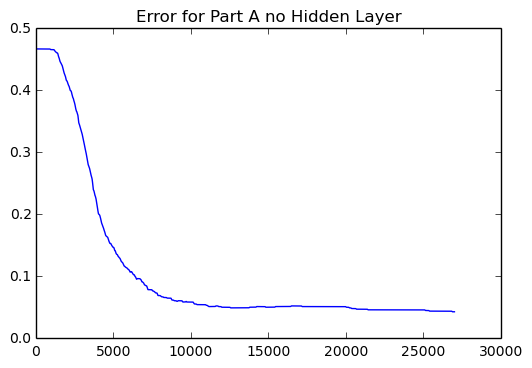

Error stabilizes at 22k epochs
Learning Rate 0.0008


In [112]:
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.title("Error for Part A no Hidden Layer")
plt.show()
print("Error stabilizes at 22k epochs\nLearning Rate 0.0008")

In [114]:
errors =[]
with tf.Session() as sess:
    sess.run(initialize)
    
    correctPrediction = tf.equal(tf.argmax(activation,1), 
                                 tf.argmax(yGold,1))
    accuracy = tf.reduce_mean(tf.cast(correctPrediction,"float"))
       
    cost = 0
    diff = 1
    
    for i in range(epochs):
        if i > 1 and diff < 0.0001:
            print("change in cost %g; convergence."%diff)
            break
        else:
            step = sess.run(training, feed_dict={X: trainX, yGold: trainY})
            Caccuracy = accuracy.eval(feed_dict={X: trainX, yGold: trainY})
            errors.append(1-Caccuracy)
           
            if i % 1000 == 0:
                print("Epoch: %i error: %f"%(i,errors[-1]))
       
    print("Final Accuracy on Test Set: %s"%str(sess.run(accuracy,
                                                        feed_dict={X: testX,
                                                                   yGold: testY})))
    saver = tf.train.Saver()

Epoch: 0 error: 0.466946
Epoch: 1000 error: 0.466946
Epoch: 2000 error: 0.451207
Epoch: 3000 error: 0.398741
Epoch: 4000 error: 0.324239
Epoch: 5000 error: 0.229801
Epoch: 6000 error: 0.167891
Epoch: 7000 error: 0.131165
Epoch: 8000 error: 0.110178
Epoch: 9000 error: 0.091291
Epoch: 10000 error: 0.076600
Epoch: 11000 error: 0.068206
Epoch: 12000 error: 0.060860
Epoch: 13000 error: 0.059811
Epoch: 14000 error: 0.054565
Epoch: 15000 error: 0.054565
Epoch: 16000 error: 0.051417
Epoch: 17000 error: 0.049318
Epoch: 18000 error: 0.049318
Epoch: 19000 error: 0.051417
Epoch: 20000 error: 0.052466
Epoch: 21000 error: 0.051417
Epoch: 22000 error: 0.052466
Epoch: 23000 error: 0.051417
Epoch: 24000 error: 0.051417
Epoch: 25000 error: 0.051417
Epoch: 26000 error: 0.050367
Final Accuracy on Test Set: 0.92381


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


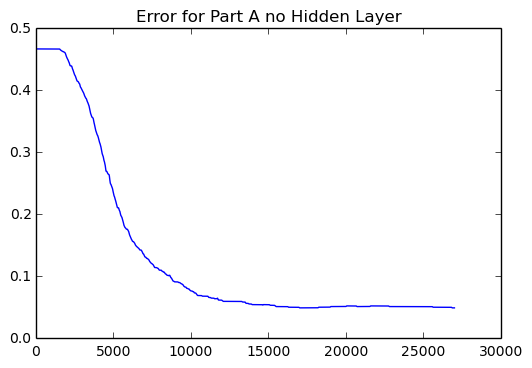

Error stabilizes at 27k epochs: %f
Learning Rate 0.0006


In [115]:
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.title("Error for Part A no Hidden Layer")
plt.show()
print("Error stabilizes at 27k epochs: %f\nLearning Rate 0.0006")

In [124]:
errors =[]
with tf.Session() as sess:
    sess.run(initialize)
    
    correctPrediction = tf.equal(tf.argmax(activation,1), 
                                 tf.argmax(yGold,1))
    accuracy = tf.reduce_mean(tf.cast(correctPrediction,"float"))
       
    cost = 0
    diff = 1
    
    for i in range(epochs):
        if i > 1 and diff < 0.0001:
            print("change in cost %g; convergence."%diff)
            break
        else:
            step = sess.run(training, feed_dict={X: trainX, yGold: trainY})
            Caccuracy = accuracy.eval(feed_dict={X: trainX, yGold: trainY})
            errors.append(1-Caccuracy)
           
            if i % 1000 == 0:
                print("Epoch: %i error: %f"%(i,errors[-1]))
       
    print("Final Accuracy on Test Set: %s"%str(sess.run(accuracy,
                                                        feed_dict={X: testX,
                                                                   yGold: testY})))
    saver = tf.train.Saver()

Epoch: 0 error: 0.421826
Epoch: 1000 error: 0.461700
Epoch: 2000 error: 0.380902
Epoch: 3000 error: 0.235047
Epoch: 4000 error: 0.142707
Epoch: 5000 error: 0.105981
Epoch: 6000 error: 0.075551
Epoch: 7000 error: 0.061910
Epoch: 8000 error: 0.056663
Epoch: 9000 error: 0.052466
Epoch: 10000 error: 0.050367
Epoch: 11000 error: 0.049318
Epoch: 12000 error: 0.050367
Epoch: 13000 error: 0.051417
Epoch: 14000 error: 0.051417
Epoch: 15000 error: 0.051417
Epoch: 16000 error: 0.049318
Epoch: 17000 error: 0.046170
Epoch: 18000 error: 0.046170
Epoch: 19000 error: 0.046170
Epoch: 20000 error: 0.045121
Epoch: 21000 error: 0.045121
Epoch: 22000 error: 0.043022
Epoch: 23000 error: 0.043022
Epoch: 24000 error: 0.040923
Epoch: 25000 error: 0.040923
Epoch: 26000 error: 0.040923
Final Accuracy on Test Set: 0.933333


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


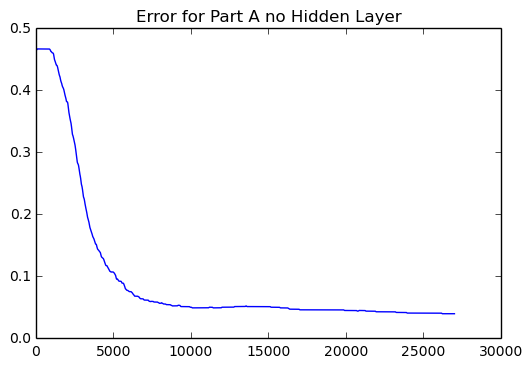

Error stabilizes at 24k epochs: 0.039874
Learning Rate 0.0010


In [127]:
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.title("Error for Part A no Hidden Layer")
plt.show()
print("Error stabilizes at 24k epochs: %f\nLearning Rate 0.0010"%errors[-1])